## Анализ данных

Маски для стен и окон предоставлены в готовом виде, в виде изображений разрешения 512x512.

Маски для дверей нужно сгенерировать из данных в формате json. Также в этом файле находится исходное изображение и все необходимые ключевые точки для самостоятельной генерации масок.

Извлечем изображения и сгенерируем маски в папки *images* и *masks* соотвественно.

In [1]:
import json
import glob
import base64
from pathlib import Path
from datetime import datetime

import cv2
import numpy as np
import matplotlib.pyplot as plt

labels = {'wall':1, 'window':2, 'door':3}

In [2]:
for i, filename in enumerate(sorted(glob.glob('train/object_detection/*.json')), start=1):
    
    if i % 500 == 0:
        print(f"{datetime.now().strftime('%H:%M:%S')} {i}")

    with open(filename, 'r') as file:
        json_contents = json.load(file)

    img_name = Path(filename).stem

    image = np.asarray(bytearray(base64.b64decode(json_contents['imageData'])), dtype=np.uint8)
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    mask = np.zeros(image.shape[:2], dtype=np.uint8)

    for shapes in json_contents['shapes']:
        if shapes['label'] not in labels or \
           shapes['shape_type'] not in {'polygon', 'rectangle'} or \
           len(shapes['points']) < 2:
                continue

        label = labels.get(shapes['label'], 0)
        pts = np.array(shapes['points'], np.int32).reshape((-1, 1, 2))
        
        if shapes['label'] == 'door':
            x_min = pts[..., 1].min()
            y_min = pts[..., 0].min()
            x_max = pts[..., 1].max()
            y_max = pts[..., 0].max()
            mask = cv2.rectangle(mask, (y_min, x_min), (y_max, x_max), label, -1)
        else:
            mask = cv2.fillPoly(mask, pts=[pts], color=label)


#     cv2.imwrite(f'images/{img_name}.png', image)
    cv2.imwrite(f'masks2/{img_name}.png',  mask)

print(f"{datetime.now().strftime('%H:%M:%S')} done")

22:53:49 500
22:53:53 1000
22:53:56 1500
22:54:01 2000
22:54:05 2500
22:54:09 3000
22:54:12 3500
22:54:12 done


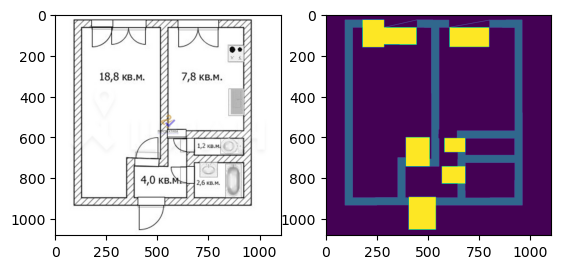

In [3]:
f, ax = plt.subplots(1, 2)

ax[0].imshow(image)
ax[1].imshow(mask)

plt.show()